In [1]:
# http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/
using Distributions
using Plots
pyplot()
srand(123)
print()

In [29]:
function mcmc(data, samples = 100, μ_init = 0.5, proposal_width = 0.5, μ_prior_μ = 0, μ_prior_σ = 1)
    μ_current = μ_init
    posterior = Float64[ μ_current ]
    draws_total = Float64[ μ_current ] # for the trace plot
    draws_accepted = Float64[ μ_current ] # for the plot showing only accepted values

    for i = 1:samples
        # Suggest a random new value for μ
        μ_proposal = rand(Normal(μ_current, proposal_width))
        append!(draws_total, μ_proposal)

        # Compute probability of the data for a Normal Distribution with
        # the current μ by multiplying probabilities of each data point
        likelihood_current = loglikelihood(Normal(μ_current, 1), data)
        
        # Compute probability of the data for the proposal distribution
        likelihood_proposal = loglikelihood(Normal(μ_proposal, 1), data)

        # Compute prior probability of current and proposed μ
        prior_current = logpdf(Normal(μ_prior_μ, μ_prior_σ), μ_current)
        prior_proposal = logpdf(Normal(μ_prior_μ, μ_prior_σ), μ_proposal)

        # Posterior probabilities (we use logs, therefore +)
        p_current = likelihood_current + prior_current
        p_proposal = likelihood_proposal + prior_proposal
        
        # Accept proposal? Since we used logs, convert back to probabilities
        p_accept = exp(p_proposal - p_current)
        
        if rand(Uniform(0, 1)) < p_accept
            μ_current = μ_proposal
            append!(posterior, μ_current)
            append!(draws_accepted, μ_current)
        else
            append!(draws_accepted, draws_accepted[end])
        end
    end

    return [ posterior, draws_total, draws_accepted ]
end

mcmc (generic function with 6 methods)

In [49]:
# Generate sample data
data = rand(Normal(40, 100), 1000)

# Run simulation with ridiculous starting values
runs = 100
m = mcmc(data, runs, -10, 3, -130, 300)

# See it converge nevertheless
data_μ = sum(data)/length(data)
deviance = round(abs(100 - data_μ / m[1][end]*100), 3)

print("Data μ: ", data_μ, "\n")
print("MCMC μ: ", m[1][end], "     (", length(m[1]), " accepted out of ", runs, " samples)\n")
print("Diff %: ", deviance)

Data μ: 39.240794247451824
MCMC μ: 39.208497113190646     (37 accepted out of 300 samples)
Diff %: 0.082


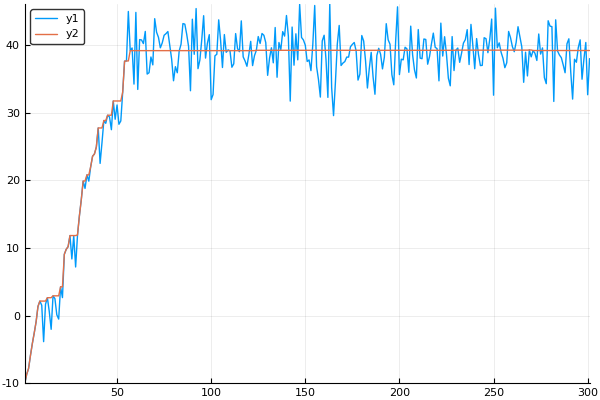

In [50]:
# Traceplot
Plots.plot(m[2])
Plots.plot!(m[3])